In [2]:
%matplotlib inline
import PIL
from PIL import Image
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
import numpy as np
import matplotlib.pyplot as plt

[[ 88  96  88 ... 120 122 121]
 [ 90 100 100 ... 121 128 130]
 [ 92 104 112 ... 122 135 141]
 ...
 [ 35  35  50 ...  25  24   8]
 [ 13  14  46 ...  26  23   9]
 [  0   1  38 ...  25  22   6]]


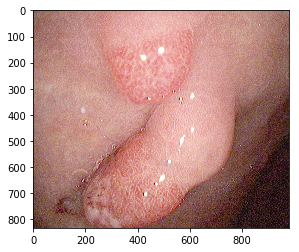

In [3]:
# image read
img=Image.open(r"/Users/apple/Desktop/python_program/polyps/0a874a44-90ea-42ea-a467-92a1d3a4a26c.jpg")
img_gray=img.convert('L') #converting to grayscale
img_arr=np.array(img_gray) #convert to array
plt.imshow(img)
print(img_arr)


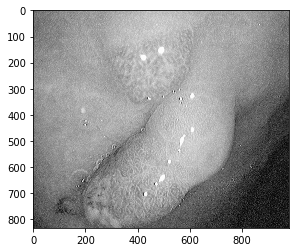

In [4]:

plt.imshow(img_gray)

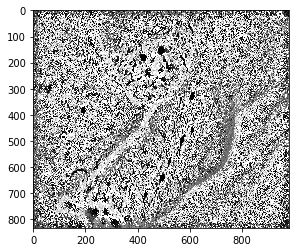

In [5]:
#LBP
feat_lbp=local_binary_pattern(img_arr,8,25,'uniform')
feat_lbp=np.uint8((feat_lbp/feat_lbp.max())*255) # convert uint 8
lbp_img=PIL.Image.fromarray(feat_lbp)#conversion from array to PIL image
plt.imshow(lbp_img,cmap='gray') # show LBP image


In [6]:
# energy and entropy as a feature
lbp_hist,_=np.histogram(feat_lbp, 8)
lbp_hist=np.array(lbp_hist, dtype=float)
lbp_prob=np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy=np.sum(lbp_prob**2)
lbp_entropy= -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP energy= '+str(lbp_energy))
print('LBP entropy= '+str(lbp_entropy))

LBP energy= 0.24053658149154344
LBP entropy= 2.494753317212783


In [7]:
# co-occurance matrix (GLCM)
gcomat=greycomatrix(img_arr,[2],[0],256,symmetric=True,normed=True) # GLCM
contrast=greycoprops(gcomat,prop='contrast')
homogeneity=greycoprops(gcomat,prop='homogeneity')
energy=greycoprops(gcomat,prop='energy')
correlation=greycoprops(gcomat,prop='correlation')
print('Contrast= '+str(contrast [0][0]))
print('Homogeneity= '+str(homogeneity [0][0]))
print('Energy= '+str(energy [0][0]))
print('Correlation= '+str(correlation [0][0]))

Contrast= 227.29673832723273
Homogeneity= 0.09225094103350953
Energy= 0.013099831363336825
Correlation= 0.9503484245825187
